[testo del link](https://)# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data.

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [2]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [3]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

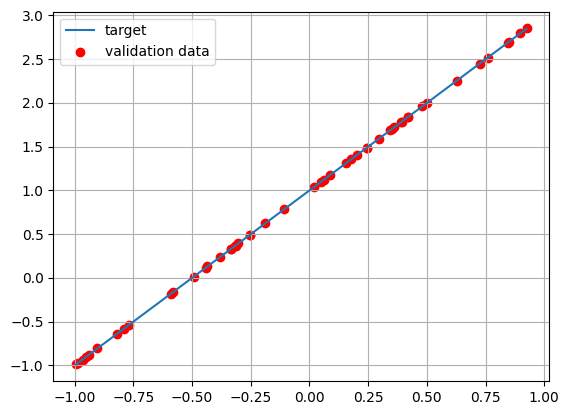

In [4]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [7]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.9332 - mse: 0.9332 - val_loss: 0.5524 - val_mse: 0.5524
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4783 - mse: 0.4783 - val_loss: 0.3030 - val_mse: 0.3030
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2864 - mse: 0.2864 - val_loss: 0.1708 - val_mse: 0.1708
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1635 - mse: 0.1635 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1019 - mse: 0.1019 - val_loss: 0.0607 - val_mse: 0.0607
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mse: 0.0665 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0277 - mse: 0.0277 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - mse

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [8]:
# return weights and biases
model.get_weights()

[array([[1.9810959]], dtype=float32), array([0.99975336], dtype=float32)]

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1063e-04 - mse: 1.1063e-04

Test loss: 0.00011356962204445153
Test accuracy: 0.00011356962204445153


In [10]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.1063e-04 - mse: 1.1063e-04

Test loss: 0.00011356962204445153
Test accuracy: 0.00011356962204445153


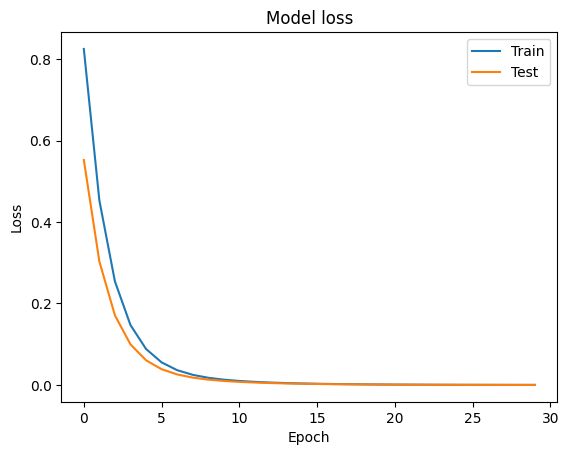

In [11]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


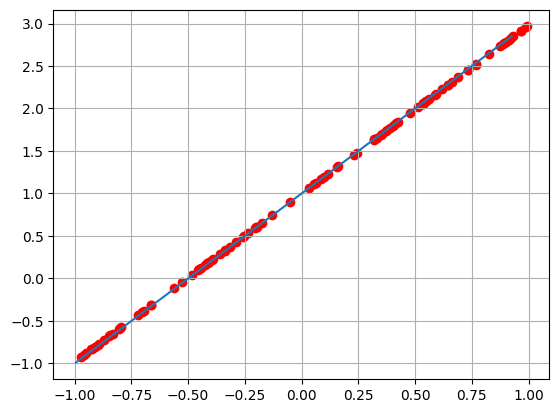

In [12]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0.5, 1.0, 'Interpolation results varying the number of training epochs - no noise')

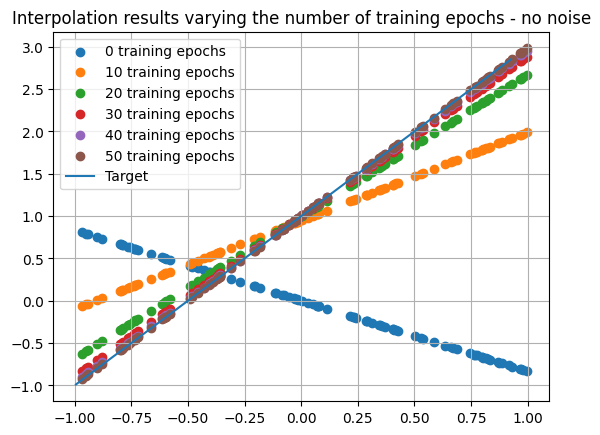

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
fig, ax= plt.subplots()
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

y_predicted = model.predict(x_predicted)
ax.scatter(x_predicted, y_predicted,label= rf'0 training epochs')

for i in range(5):
  history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=10,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose=0)
  y_predicted = model.predict(x_predicted)
  ax.scatter(x_predicted, y_predicted,label= rf'{i*10+10} training epochs')
ax.grid(True)
ax.plot(x_valid, y_target, label='Target')
ax.legend()
ax.set_title('Interpolation results varying the number of training epochs - no noise')



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


Text(0.5, 1.0, 'Interpolation results varying the number of training points - no noise')

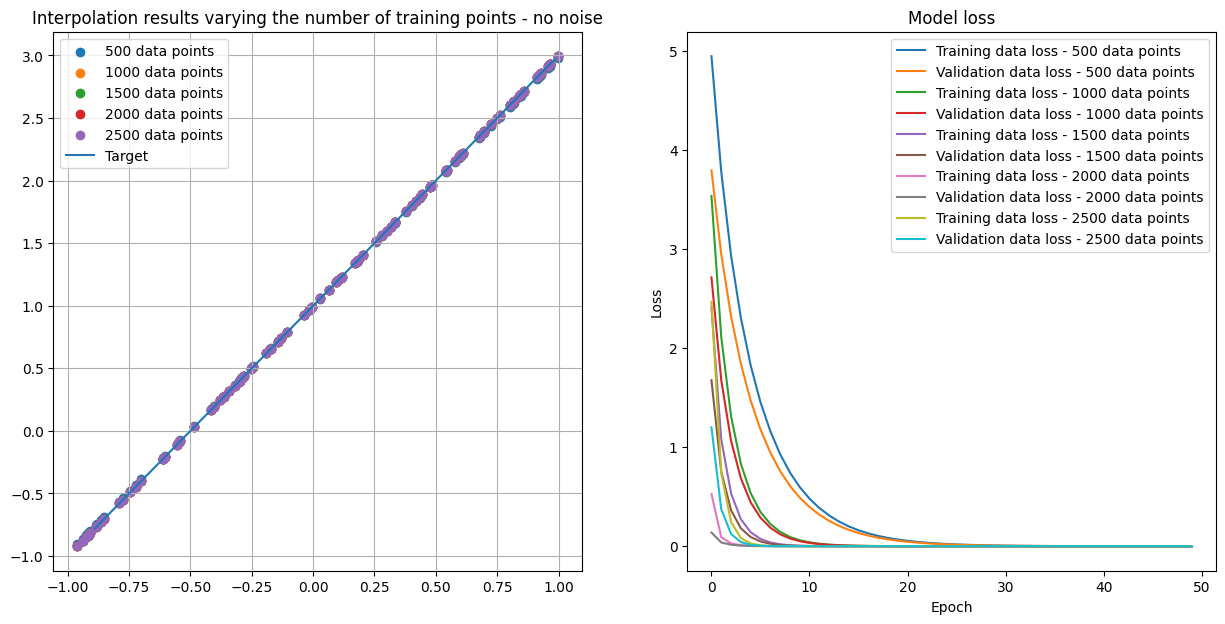

In [14]:
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted_tensor = tf.convert_to_tensor(x_predicted.reshape(-1, 1), dtype=tf.float32)

fig, ax= plt.subplots(1, 2, figsize=(15, 7))

for i in range(5):
  np.random.seed(0)
  x_train = np.random.uniform(-1, 1, 500*i+500)
  x_valid = np.random.uniform(-1, 1, 50)
  x_valid.sort()
  y_target = m * x_valid + b # ideal (target) linear function

  sigma = 0.0 # noise standard deviation, for the moment it is absent
  y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
  y_valid = np.random.normal(m * x_valid + b, sigma)
  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))
  model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
  history = model.fit(x=x_train, y=y_train,
        batch_size=32, epochs=50,
        shuffle=True, # a good idea is to shuffle input before at each epoch
        validation_data=(x_valid, y_valid),
        verbose=0)

  y_predicted = model.predict(x_predicted_tensor)
  ax[0].scatter(x_predicted_tensor, y_predicted,label= rf'{i*500+500} data points')
  ax[1].plot(history.history['loss'], label=rf'Training data loss - {i*500+500} data points')
  ax[1].plot(history.history['val_loss'], label = rf'Validation data loss - {i*500+500} data points')

ax[1].set_title('Model loss')
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[0].grid(True)
ax[0].plot(x_valid, y_target, label='Target')
ax[0].legend()
ax[0].set_title('Interpolation results varying the number of training points - no noise')

Text(0.5, 1.0, 'Interpolation results varying the number of training points - with noise')

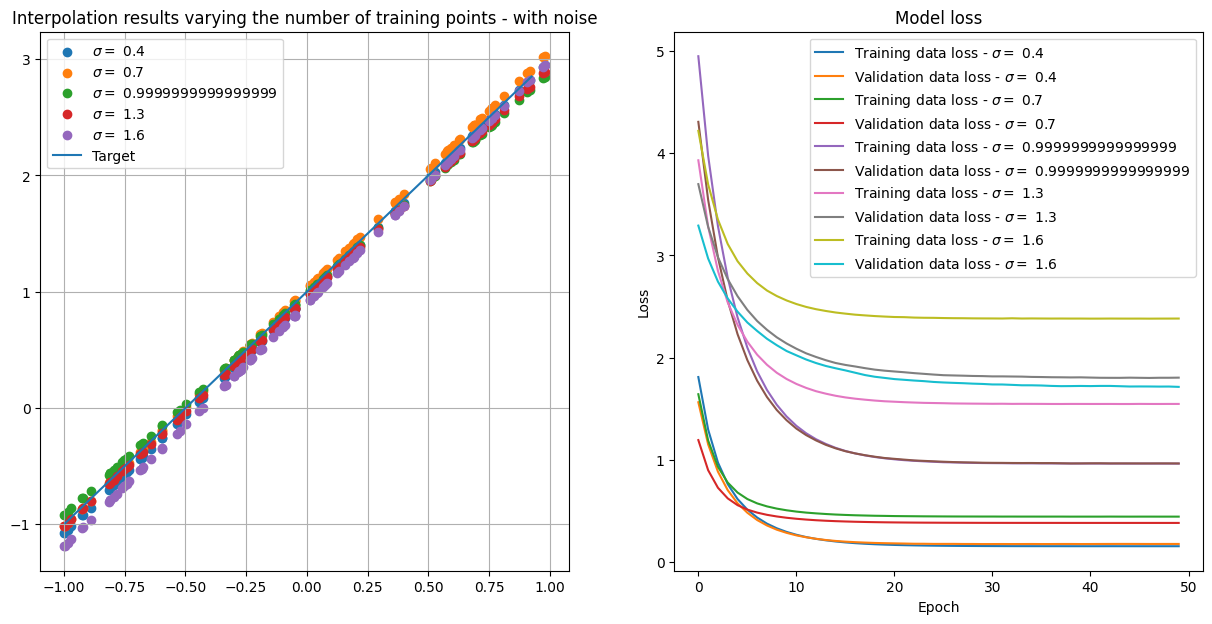

In [15]:
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted_tensor = tf.convert_to_tensor(x_predicted.reshape(-1, 1), dtype=tf.float32)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function



for i in range(1, 6):
  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))
  model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
  sigma = 0.3*i+0.1 # noise standard deviation, for the moment it is absent
  y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
  y_valid = np.random.normal(m * x_valid + b, sigma)
  history = model.fit(x=x_train, y=y_train,
        batch_size=32, epochs=50,
        shuffle=True, # a good idea is to shuffle input before at each epoch
        validation_data=(x_valid, y_valid),
        verbose=0)
  y_predicted = model.predict(x_predicted_tensor, verbose=0)
  ax[0].scatter(x_predicted_tensor, y_predicted,label= rf'$\sigma =$ {i*0.3+0.1}')
  ax[1].plot(history.history['loss'], label=rf'Training data loss - $\sigma =$ {i*0.3+0.1}')
  ax[1].plot(history.history['val_loss'], label = rf'Validation data loss - $\sigma =$ {i*0.3+0.1}')

ax[1].set_title('Model loss')
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[0].grid(True)
ax[0].plot(x_valid, y_target, label='Target')
ax[0].legend()
ax[0].set_title('Interpolation results varying the number of training points - with noise')

#### Commenti
##### Scopo dell'esercizio e risultati aspettati
- Capire come il numero di epoche, la dimensione del dataset di training e il livello di rumore influenzano le prestazioni di una regressione lineare implementata attraverso un percettrone.
- Mi aspetto di trovare una retta casuale prima di iniziare il training, che poi diventa sempre più simile alla retta del modello all'aumentare delle epoche.
- Un dataset più grande di training in generale dovrebbe migliorare le capacità di generalizzazione della rete. Ci sono però due limiti principali a questo principio generale: se il numero di dati è troppo grande o troppo piccolo rispetto al numero di parametri della rete, la rete farà overfitting o comunque non riuscirà ad imparare. Non mi aspetto di vedere però questo tipo di problemi per una rete lineare come il percettrone.
- Un rumore maggiore dovrebbe portare a valori di loss maggiori, rendendo più difficile l'apprendimento.
##### Risultati
- Aumentando il numero di epoche di training vedo un fit sempre migliore della retta teorica.
- Aumentando il numero di dati non vedo particolari problemi di overfitting, ma vedo che la loss satura verso il basso più velocemente. Questo è dovuto al fatto che aumentando il numero di dati sto aumentando il numero di mini-batch per epoca su cui il mio SGD si allena e quindi l'algoritmo sembra convergere più velocemente, quando in realtà questo non succede.
- Aumentando il rumore, vedo che il fit della mia retta teorica da parte della rete peggiora sempre di più e la loss satura verso il basso a valori sempre maggiori.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set?
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

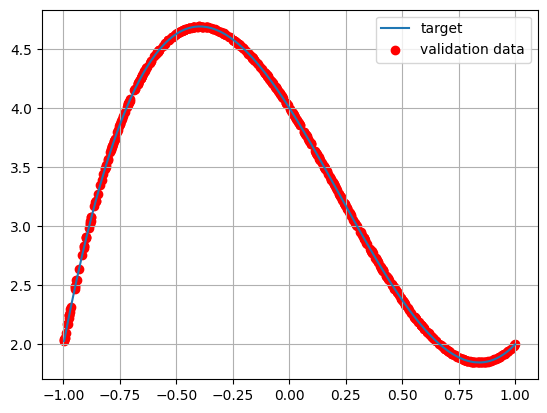

In [16]:
#Target data
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = 4-3*x_valid-2*pow(x_valid, 2)+3*pow(x_valid, 3)

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4-3*x_train-2*pow(x_train, 2)+3*pow(x_train, 3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*pow(x_valid, 2)+3*pow(x_valid, 3), sigma)

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
model = tf.keras.Sequential()
model = Sequential()
model.add(Dense(200, activation='tanh', input_shape=(1,)))
model.add(Dense(200, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


In [18]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 200)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,801 (159.38 KB)

 Trainable params: 40,801 (159.38 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(x=x_train, y=y_train,
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

In [20]:
print('loss sul training dataset: ', history.history['loss'][-1])
print('loss sul test dataset: ', history.history['val_loss'][-1])

loss sul training dataset:  0.0021319224033504725
loss sul test dataset:  0.00261486042290926


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Text(0.5, 0, 'Epoch')

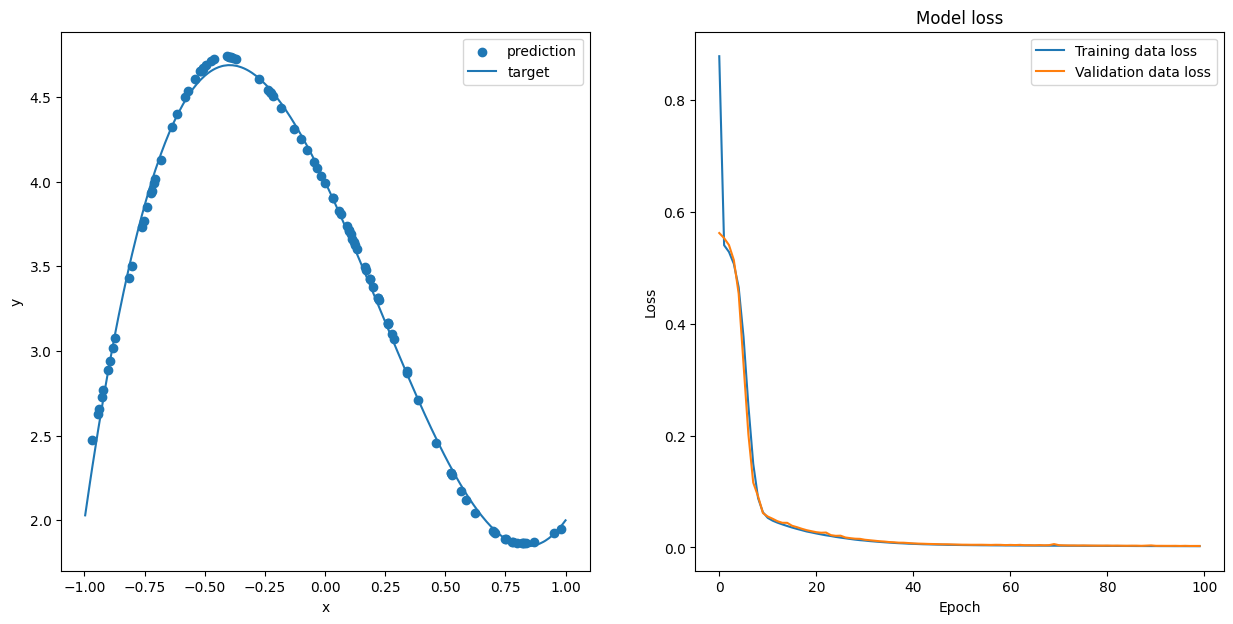

In [21]:
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
y_predicted=model.predict(x_predicted)
fig, ax=plt.subplots(1, 2, figsize=(15,7))
ax[0].scatter(x_predicted, y_predicted, label="prediction")
ax[0].plot(x_valid, y_target, label='target')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].plot(history.history['loss'], label=rf'Training data loss')
ax[1].plot(history.history['val_loss'], label = rf'Validation data loss')

ax[1].set_title('Model loss')
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Text(0, 0.5, 'y')

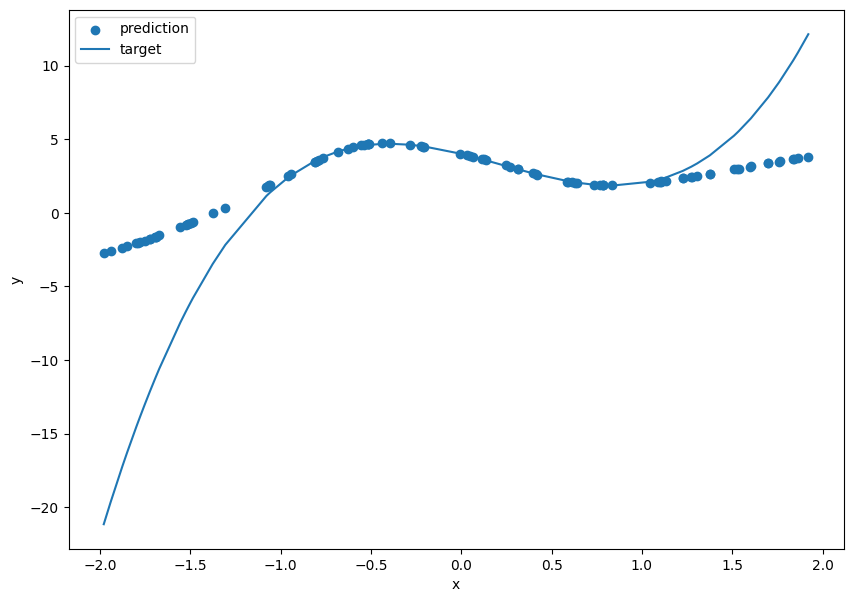

In [22]:
x_predicted = np.random.uniform(-2, 2, 100)
x_pred_sorted = np.sort(x_predicted)
y_predicted=model.predict(x_predicted)
y_theoretical = 4 - 3*x_pred_sorted - 2*(x_pred_sorted**2) + 3*(x_pred_sorted**3)
fig, ax=plt.subplots(1, 1, figsize=(10,7))
ax.scatter(x_predicted, y_predicted, label="prediction")
ax.plot(x_pred_sorted, y_theoretical, label='target')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

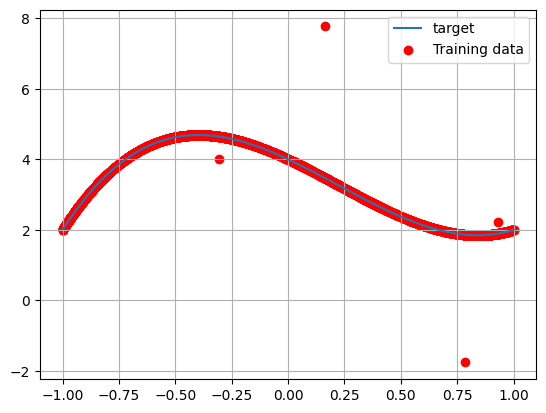

In [23]:
num_outliers = 5 # Number of outliers to add
x_outliers = np.random.uniform(-1, 1, num_outliers)
y_outliers = np.random.uniform(-3, 10, num_outliers)

x_train_with_outliers = np.concatenate((x_train, x_outliers))
y_train_with_outliers = np.concatenate((y_train, y_outliers))
x_valid.sort()

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_train_with_outliers, y_train_with_outliers, color='r', label='Training data')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
model = tf.keras.Sequential()
model = Sequential()
model.add(Dense(200, activation='tanh', input_shape=(1,)))
model.add(Dense(200, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [25]:
history = model.fit(x=x_train_with_outliers, y=y_train_with_outliers,
          batch_size=32, epochs=100,
          shuffle=True,
          validation_data=(x_valid, y_valid), verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Text(0.5, 0, 'Epoch')

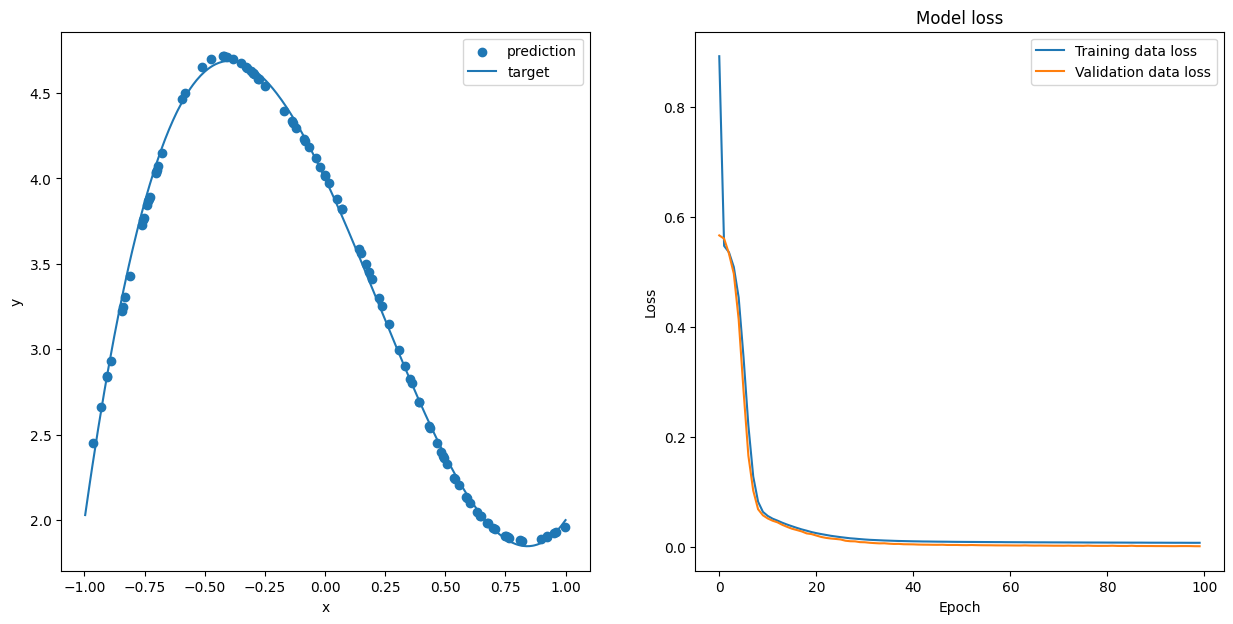

In [26]:
x_predicted = np.random.uniform(-1, 1, 100)
x_predicted.sort()
y_predicted=model.predict(x_predicted)
fig, ax=plt.subplots(1, 2, figsize=(15,7))
ax[0].scatter(x_predicted, y_predicted, label="prediction")
ax[0].plot(x_valid, y_target, label='target')
ax[0].legend()
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].plot(history.history['loss'], label=rf'Training data loss')
ax[1].plot(history.history['val_loss'], label = rf'Validation data loss')

ax[1].set_title('Model loss')
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')

In [27]:
print('loss sul training dataset: ', history.history['loss'][-1])
print('loss sul test dataset: ', history.history['val_loss'][-1])

loss sul training dataset:  0.008257374167442322
loss sul test dataset:  0.0020321288611739874


#### Commenti
##### Scopo dell'esercizio e risultati aspettati
- Usare funzioni di attivazione non lineari per fare un fitting di una funzione polinomiale non lineare di terzo grado.
-Studiare la robustezza del modello allenandolo con dati outliers e vedendo come si comporta all'esterno dell'intervallo di training.
- Ci si aspetta un fit accurato sull'intervallo di training e un comportamento poco accurato fuori dall'intervallo di training, in quanto i neuroni della rete non imparano le informazioni sulla funzione fuori dall'intervallo di training.
- Se il modello è troppo semplice potrei ottenere underfitting, mentre se è troppo complesso potrei ottenere overfitting
- Per quanto riguarda l'allenamento con outliers, ci si aspetta una loss più alta dovuta alla presenza di questi outliers. Se la rete presenta un'architettura ottimale e non ho troppi outliers rispetto al numero di dati di training, il polinomio però dovrebbe essere approssimato accuratamente lo stesso. Questo può essere un metodo per testare la robustezza della rete.

##### Risultati
- Utilizzando 2 hidden layer da 200 neuroni l'uno con funzione di attivazione $\textit{tanh}$ ottengo un buon fit del polinomio sull'intervallo di allenamento dopo 100 epoche di allenamento, mentre fuori dall'intervallo la rete non riesce a fare una predizione corretta del polinomio.
- Si osserva una loss maggiore sui dati del training set rispetto che su quelli del test set, come aspettato.
- Allenando la rete su un dataset con outliers ottengo dopo 100 epoche di allenamento una loss sul training set intorno a $10^{-2}$ e una loss sul test set intorno a $10^{-3}$. Il fatto che la loss sul test set sia minore che quella sul training set si può spiegare con la presenza di outliers nel training set.
Allenando invece la rete sul dataset senza outliers trovo che dopo 100 epoche sia la loss sul training set sia quella sul test set sono intorno a $10^{-3}$.  La loss sul training set è un ordine di grandezza superiore per la rete allenata con outliers. Questo fatto può ancora una volta essere spiegato dalla presenza di outliers.
- Osservando le predizioni del modello allenato con outliers noto che la rete possiede una buona robustezza. Non noto problemi di overfitting o underfitting.


### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

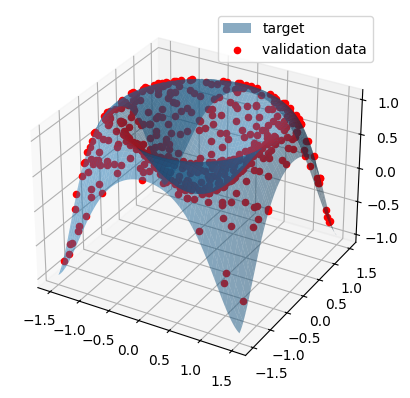

In [28]:
#Target data
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 5000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
x_valid_sorted=np.sort(x_valid)
y_train = np.random.uniform(-1.5, 1.5, 5000)
y_valid = np.random.uniform(-1.5, 1.5, 500)
y_valid_sorted=np.sort(y_valid)
X, Y = np.meshgrid(x_valid_sorted, y_valid_sorted)
Z = np.sin(pow(X,2)+pow(Y, 2))
z_target = np.sin(pow(x_valid,2)+pow(y_valid, 2))

sigma = 0.0 # noise standard deviation, for the moment it is absent
z_train = np.random.normal( np.sin(pow(x_train,2)+pow(y_train, 2)), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal( np.sin(pow(x_valid,2)+pow(y_valid, 2)), sigma)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, label='target', alpha=0.5)
ax.scatter(x_valid, y_valid, z_target, color='r', label='validation data', depthshade=False)
plt.legend()
plt.grid(True)
plt.show()

In [29]:
model = tf.keras.Sequential()
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(2,)))  # hidden layer con 2 neuroni e attivazione relu
model.add(Dense(50, activation='relu'))  # hidden layer con 2 neuroni e attivazione relu

model.add(Dense(1))
opt=keras.optimizers.SGD(learning_rate=1e-3)
model.compile(optimizer=opt,loss='mse', metrics=['mse'])

In [30]:
X_train = np.stack([x_train, y_train], axis=1)
X_valid = np.stack([x_valid, y_valid], axis=1)
history = model.fit(x=X_train, y=z_train,
          batch_size=32, epochs=500,
          shuffle=True,
          validation_data=(X_valid, z_valid), verbose=0)

In [31]:
print('loss sul training dataset: ', history.history['loss'][-1])
print('loss sul test dataset: ', history.history['val_loss'][-1])

loss sul training dataset:  0.0035527644213289022
loss sul test dataset:  0.0037097763270139694


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Text(0.5, 0, 'Epoch')

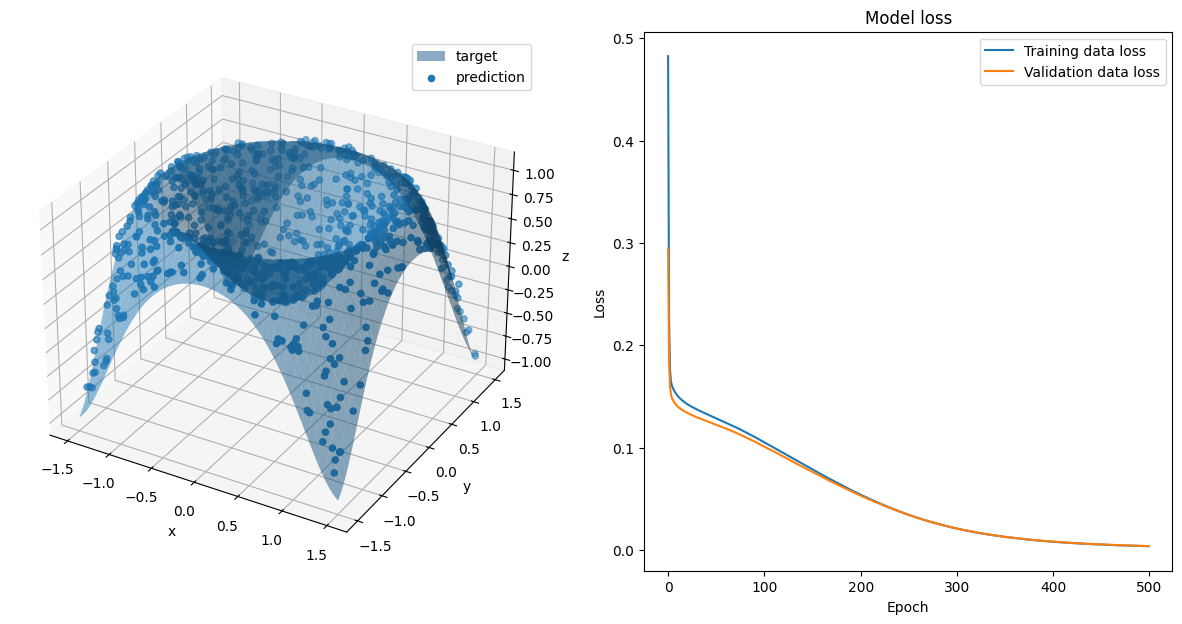

In [32]:
x_predicted = np.random.uniform(-1.5, 1.5, 1000)
y_predicted = np.random.uniform(-1.5, 1.5, 1000)
X_predicted = np.stack([x_predicted, y_predicted], axis=1)

z_predicted=model.predict(X_predicted)

fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot_surface(X, Y, Z, label='target', alpha=0.5)
ax1.scatter(x_predicted, y_predicted, z_predicted.flatten(), label="prediction")
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax2.plot(history.history['loss'], label=rf'Training data loss')
ax2.plot(history.history['val_loss'], label = rf'Validation data loss')

ax2.set_title('Model loss')
ax2.legend()
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')

#### Commenti
##### Scopo dell'esercizio e risultati aspettati
- Estendere ad una funzione 2D il modello.
- Ci si aspetta una buona approssimazione da parte della rete alla funzione proposta nell'intervallo di training
- Essendo il problema più complesso potrei avere bisogno di una rete più profonda. Potrei aver bisogno di allenare la rete per un numero di epoche maggiore.
##### Risultati
- Usando la funzione di attivazione $\textit{ReLu}$ con 2 hidden layers da 50 neuroni l'uno, riesco ad ottenere un buon fit della funzione. Dunque, al contrario di quanto ci si aspettava non è necessario avere una rete più complessa per fare un buon fit della funzione. Serve però allenarla per 500 epoche, molto di più delle 100 necessarie per allenare la rete dell'esercizio precedente.
- Si potrebbe pensare che la rete costruita per l'esercizio precedente sia troppo complessa rispetto al problema proposto, o che magari una funzione di attivazione diversa come la $\textit{ReLu}$ possa essere più adatta. In realtà ho notato svolgendo l'esercizio che la rete, anche allenandola per un numero maggiore di epoche, una volta ridotto il numero di parametri e cambiata la funzione di attivazione non riusciva più a cogliere alcune caratteristiche del polinomio, quali il cambio di concavità nella parte destra dell'intervallo di training. Potrebbe essere che qualcosa di simile stia succedendo anche in questo esercizio, ma che questo tipo di dettagli è più difficile da cogliere essendo la funzione 2D.
- La loss ottenuta sul training set e test set dopo 500 epoche è intorno a $10^{-2}$. Anche qui osservo una buona capacità di generalizzazione della rete. Noto che la loss di questo esercizio è significativamente più grande di quella ottenuta nell'esercizio precedente. Confrontare le due loss andrebbe fatto in maniera molto cauta, in quanto l'architettura della rete è diversa ed è normale che un problema più complesso abbia una loss maggiore. Possiamo però interpretare la loss come una funzione per misurare l'accuratezza del fit ed effettivamente, come ho accennato precedentemente, probabilmente il fatto che io abbia semplificato la rete ha significato che alcuni dettagli della funzione non sono stati imparati perfettamente.

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>